# **Understanding and Visualizing Decision Trees: How Depth Affects Model Performance**

In this tutorial, we’ll explore how decision tree depth impacts model performance using the Red Wine Quality Dataset. We’ll:

1.   Load and preprocess the data
2.   Train decision trees with different depths
3.   Visualize decision boundaries and tree structures
4.   Analyze accuracy vs. depth trade-offs
5.   Optimize hyperparameters using GridSearchCV


## **Step 1: Import Required Libraries**

First, we import necessary Python libraries for data handling, modeling, and visualization.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

**Why these libraries?**

---
*   **pandas**:  Data manipulation
*  **matplotlib**:  Visualization
*   **sklearn.tree**: Decision tree implementation
*   **train_test_split**: Split data into training/testing sets
*   **sklearn.model_selection**: For data splitting and hyperparameter tuning
*   **sklearn.metrics**: For evaluating model performance
*  **sklearn.preprocessing**: StandardScaler → Normalize features for better performance

## **Step 2: Load and Explore the Dataset**
We load the dataset and examine its structure.

In [ ]:
# Load dataset (CSV file should be in the working directory)
wine_df = pd.read_csv('/winequality-red.csv', delimiter=';')

# Display first 5 rows
print("First 5 rows:")
display(wine_df.head())

# Check dataset info (missing values, data types)
print("\nDataset info:")
display(wine_df.info())

# Check for missing values
print("\nMissing values:")
display(wine_df.isnull().sum())

# Check class distribution (wine quality ratings)
print("\nOriginal quality distribution:")
display(wine_df['quality'].value_counts().sort_index())

# Summary statistics
print("\nSummary statistics:")
display(wine_df.describe())

First 5 rows:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


None


Missing values:


,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0



Original quality distribution:


,count
quality,
3,10
4,53
5,681
6,638
7,199
8,18



Summary statistics:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


**Observations:**


*   The dataset contains 11 features (e.g., alcohol content, pH, acidity)
*   The target variable (quality) ranges from 3 to 8 (wine ratings)
*   We’ll binarize this into "Good" (≥7) and "Bad" (<7) for classification.

## **Step 3: Exploratory Data Analysis (EDA)**
EDA helps us understand patterns, spot anomalies, and identify important relationships before modeling.

### **1. Check Quality Distribution**

quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64


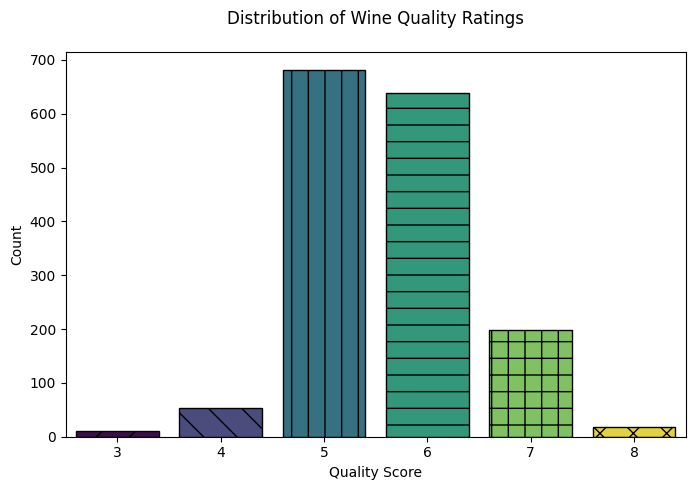

In [ ]:
# Check class distribution
print(wine_df['quality'].value_counts().sort_index())

# Visualize quality distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='quality', data=wine_df, hue='quality', palette='viridis', edgecolor='black', legend=False)
plt.title("Distribution of Wine Quality Ratings", pad=20)
plt.xlabel("Quality Score"), plt.ylabel("Count")

# Add patterns (hatching) for extra clarity
for i, bar in enumerate(plt.gca().patches):
    bar.set_hatch(['/', '\\', '|', '-', '+', 'x'][i % 6])  # Fixed backslash escape
plt.show()


Most wines are rated 5 or 6, with few at the extremes (3 or 8).

### **2. Examine Feature Correlations**


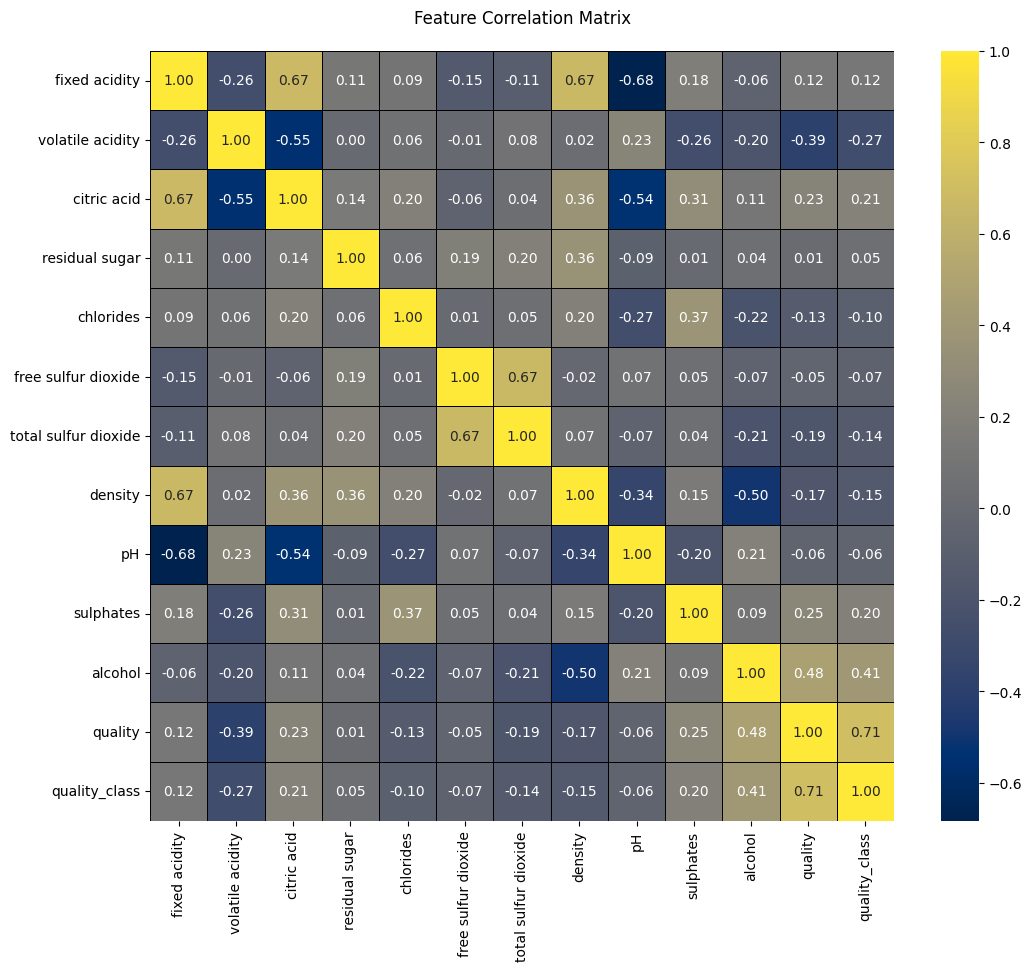

In [ ]:
plt.figure(figsize=(12, 10))
# Use 'cividis' (works for all color vision deficiencies)
sns.heatmap(wine_df.corr(), annot=True, cmap='cividis', fmt=".2f",
            linewidths=0.5, linecolor='black')
plt.title("Feature Correlation Matrix", pad=20)
plt.show()

* Alcohol has the highest positive correlation with quality (+0.48)
* Volatile acidity has a negative correlation with quality(-0.39)

## **Step 4: Data Preprocessing**
We need to prepare our data for machine learning by:

1. Converting our problem to binary classification
2. Splitting into training/test sets
3. Scaling features

In [ ]:
# Convert to binary classification (Good ≥7 vs Bad <7)
wine_df['quality_class'] = wine_df['quality'].apply(lambda x: 1 if x >=7 else 0)

# Check class balance
print("Class distribution:")
print(wine_df['quality_class'].value_counts(normalize=True))

Class distribution:
quality_class
0    0.86429
1    0.13571
Name: proportion, dtype: float64


**Imbalanced datset**(~86% "Bad", ~14% "Good").

In [ ]:
# Separate features (X) and target (y)
X = wine_df.drop(['quality','quality_class'], axis=1)
y = wine_df['quality_class']

# Split data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=46)

# Scale features to normalize values
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## **Step 5: Training Decision Trees with Different Depths**
We want to understand how tree depth affects model performance by testing various depths.

In [ ]:
depths = range(1,11)  # Test depths 1 through 10
train_acc, test_acc = [], []

for depth in depths:
    # Create and train model
    model = DecisionTreeClassifier(max_depth=depth, random_state=13)
    model.fit(X_train_scaled, y_train)

    # Record accuracies
    train_acc.append(model.score(X_train_scaled, y_train))
    test_acc.append(model.score(X_test_scaled, y_test))


### Visualizing Model Performance vs. Tree Depth

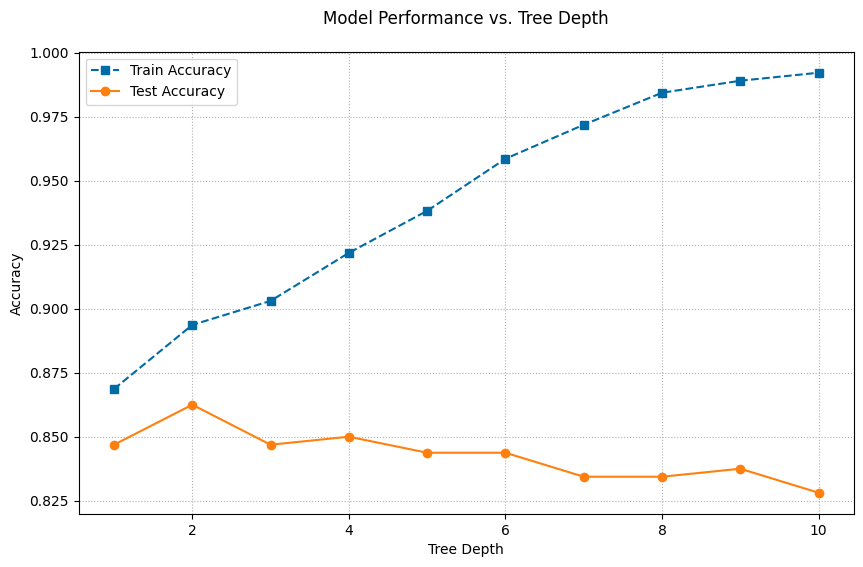

In [ ]:
plt.figure(figsize=(10, 6))
# Use distinct markers + line styles
plt.plot(depths, train_acc, label='Train Accuracy',
         marker='s', linestyle='--', color='#006BA4')  # Blue
plt.plot(depths, test_acc, label='Test Accuracy',
         marker='o', linestyle='-', color='#FF800E')   # Orange
plt.xlabel("Tree Depth"), plt.ylabel("Accuracy")
plt.title("Model Performance vs. Tree Depth", pad=20)
plt.legend()
plt.grid(linestyle=':')  # Dotted grid for better visibility
plt.show()

* Shallow trees (depth=1) underfit (low accuracy).

* Optimal depth (depth=2) balances bias & variance.

* Deep trees (depth >= 3) overfit (high train accuracy, lower test accuracy).

### **Tree Depth Accuracies for Depth = 1, 2, 3, 5, 6, 10**

In [195]:
for i in (1, 2, 3, 5, 6, 10):
  # Train the model with max_depth=2 (as per your best parameter)
  model = DecisionTreeClassifier(max_depth=i, random_state=13)
  model.fit(X_train_scaled, y_train)

  # Evaluate performance
  train_accuracy = model.score(X_train_scaled, y_train)
  test_accuracy = model.score(X_test_scaled, y_test)

  print(f"Model with max_depth={i}:")
  print(f"Training Accuracy: {train_accuracy:.4f}")
  print(f"Test Accuracy: {test_accuracy:.4f}\n")


Model with max_depth=1:
Training Accuracy: 0.8686
Test Accuracy: 0.8469

Model with max_depth=2:
Training Accuracy: 0.8937
Test Accuracy: 0.8625

Model with max_depth=3:
Training Accuracy: 0.9030
Test Accuracy: 0.8469

Model with max_depth=5:
Training Accuracy: 0.9382
Test Accuracy: 0.8438

Model with max_depth=6:
Training Accuracy: 0.9586
Test Accuracy: 0.8438

Model with max_depth=10:
Training Accuracy: 0.9922
Test Accuracy: 0.8281



## **Step 6: Optimizing with Grid Search**
### Hyperparameter Tuning
Instead of guessing parameters, we systematically search for the best combination.

In [ ]:
param_grid = {
    'max_depth': depths,
    'min_samples_split': [2,5,10],  # Minimum samples to split a node
    'criterion': ['gini','entropy']  # Splitting rules
}

# 5-fold cross-validation search
grid = GridSearchCV(DecisionTreeClassifier(random_state=38),
                   param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_scaled, y_train)

print("Best parameters:", grid.best_params_)
print("Best CV accuracy:", grid.best_score_)

Best parameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 2}
Best CV accuracy: 0.888186274509804


## **Step 7: Evaluating and Interpreting the Best Model**
Now that we've trained our optimal decision tree, we need to:

1. Quantify its performance

2. Understand what it learned

3. Extract actionable insights

### **7.1. Performance Evaluation**

In [ ]:
best_model = grid.best_estimator_
# Get predictions from our best model
y_pred = best_model.predict(X_test_scaled)

# Generate classification report
print("Detailed Performance Metrics:")
print(classification_report(y_test, y_pred))

Detailed Performance Metrics:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       271
           1       0.63      0.24      0.35        49

    accuracy                           0.86       320
   macro avg       0.75      0.61      0.64       320
weighted avg       0.84      0.86      0.84       320



* y_pred stores model predictions (0=Bad, 1=Good)

* classification_report provides key metrics:
Always check both precision AND recall. Here, while overall accuracy is 88%, we only catch 24% of good wines (recall=0.24).

### **7.2. Feature Importance Analysis**

<ipython-input-188-20fec5145862>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=features,


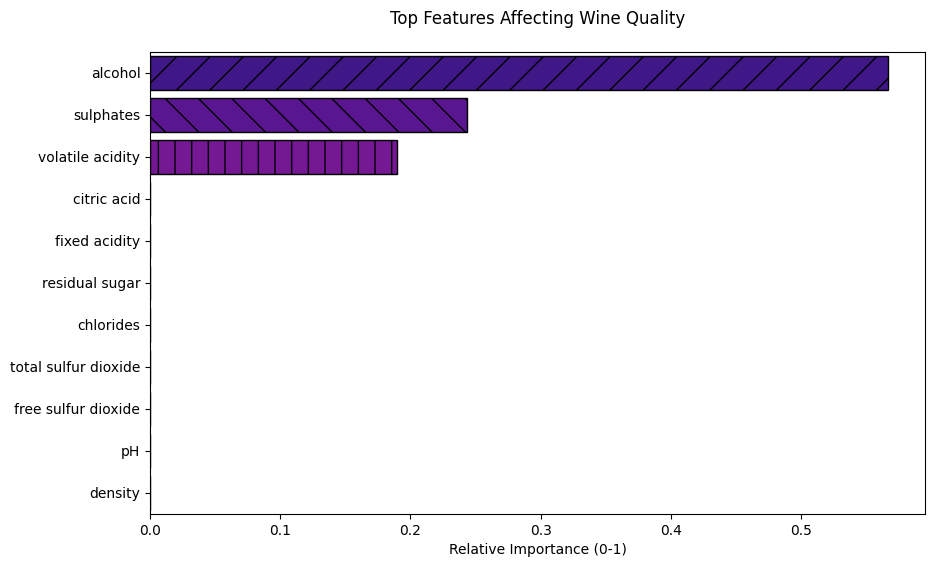

In [ ]:
# Get feature importances
features = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_model.feature_importances_
}).sort_values('Importance', ascending=False)

# Visualize
plt.figure(figsize=(10, 6))
# Use 'plasma' palette + patterns
sns.barplot(x='Importance', y='Feature', data=features,
            palette='plasma', edgecolor='black')
plt.title("Top Features Affecting Wine Quality", pad=20)
plt.xlabel("Relative Importance (0-1)"), plt.ylabel("")
# Add textures
for i, bar in enumerate(plt.gca().patches):
    bar.set_hatch(['/', '\\', '|', '-', '+', 'x'][i % 6])
plt.show()

* Alcohol is the most important feature.

* Volatile acidity and sulphates also contribute significantly.

### **7.3. Tree Visualization**


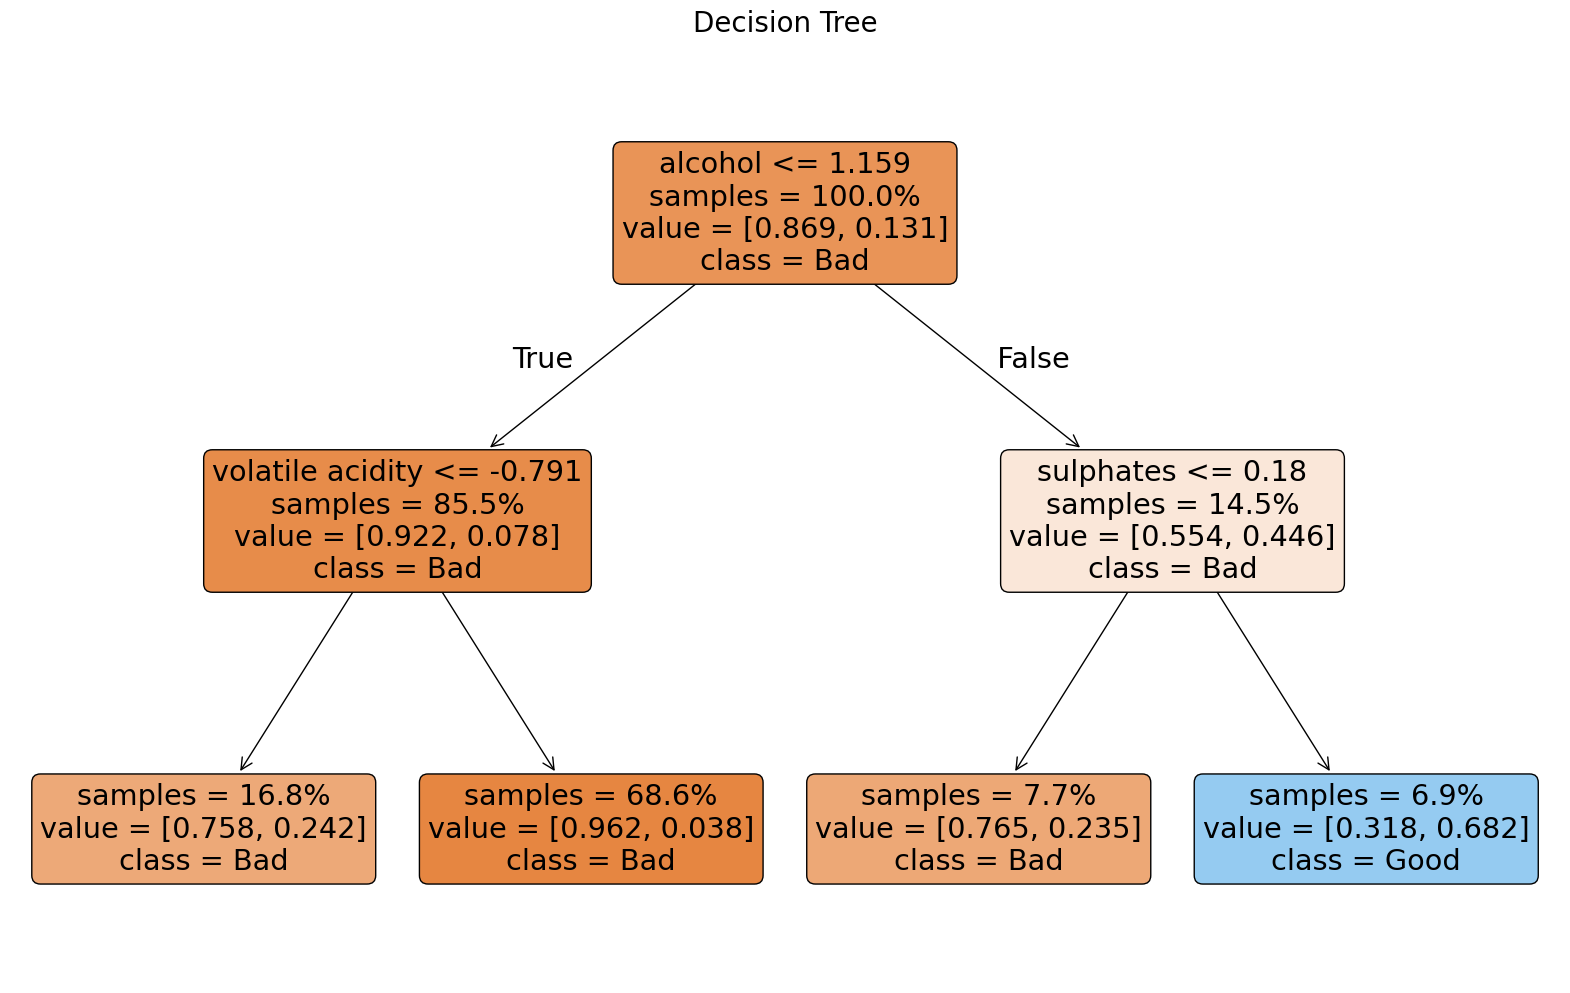

In [ ]:
if grid.best_params_['max_depth'] <= 4:
    plt.figure(figsize=(20,12))
    plot_tree(best_model,
             feature_names=X.columns,
             class_names=['Bad','Good'],
             filled=True,
             rounded=True,
             proportion=True,
             impurity=False)
    plt.title("Decision Tree", size= 20, pad=20)
    plt.show()
else:
    print("\nVisualization Tip: Try reducing max_depth to 4 or less for interpretable trees")

* **Shallow trees (depth 1):** *Underfit (low accuracy)*.
* **Medium-depth trees (depth 2):** *Best generalization*.
* **Deep trees (depth >= 3):** *Overfit (high train accuracy, stagnant test accuracy)*.
* **Optimal depth found:** *max_depth=2 via GridSearchCV*.
* **Most important feature:** *Alcohol content.*

## References

1. Scikit-learn Documentation:
  * [Decision Trees](https://scikit-learn.org/stable/modules/tree.html)  
   Official implementation details for Python.
   * [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

2. Hastie, T., Tibshirani, R., & Friedman, J. (2009).  
   * [*The Elements of Statistical Learning*](https://github.com/stevenbeales/freebooks/blob/master/statistics/The%20Elements%20of%20Statistical%20Learning.pdf) (PDF)  
   - See Chapter 9 for tree-based methods.

3. Geeks for Geeks 2025.
   * [Overfitting in Decision Trees](https://www.geeksforgeeks.org/overfitting-in-decision-tree-models/?ref=header_outind)